## Overview variables

We have quantiles for 
- FaiR: 0, 10, 17, 33, 50, 67, 83,90,95,100
- OSCAR: 16, 50(? not explicit), 84

MAGICC has runs for all the climate models (emulating?) -- could also be used as uncertainty.


Other models have only one run.

## Proposed solutions

### Solution 1:
**Assumptions**:
1. Assume all distributions are approximately gaussian
2. Assume models without variance reported can be assumed to have the same standard deviation (should it be relative to the mean??) 
3. Assume equal weight to all models

**Procedure**:
1. Estimate standard deviation for OSCAR and FaIR with 83/17 (FaIR) and 84/16 (OSCAR) quantiles ($(Q_{84}-Q_{16})/2\approx \sigma$
2. Calculate the deviation from the mean of each model $i$:
$$ f_{\sigma,i} = \sigma_i/\mu_i$$
where $i\in \{\text{FaIR}, \text{OSCAR}\}$
3. Calculate $$\overline{f_\sigma}=0.5(f_{\sigma,\text{FaIR}} + f_{\sigma, \text{OSCAR}}$$
4. Assume the other models can be assumed to have $\mu_i$, for model $i$, equal to the reported value and standard deviation:
$$\sigma_i = \mu_i \cdot \overline{f_\sigma}$$
5. **Treat all distributions as equally weighted sub-groups and calculate the total distribution**: Now treat all models as equally weighted and calculate the combined distribution.
6. Combine this with uncertainty in ECS estimates??

**Unresolved questions**:

What do we do with the ensamble runs from MAGICC? These runs I assume emulate different ESMs. See plots.

## Solution 2:

1. Fit FaIR data to distribution 
    - Assume OSCAR has same distribution and use 16 and 84 to estimate parameters? 
2. Assume same distribution for all models (only change the median?) 
3. Find the combined distribution --> percentiles. 
4. Propagate uncertainty in ECS (if hard, do some monte carlo?)

- Question: 
    - What do we do with the different MAGICC runs? 
        - Potential solution -- treat these as individual models? 

In [1]:
import xarray as xr
from IPython.display import clear_output

In [2]:
from ar6_ch6_rcmipfigs.constants import OUTPUT_DATA_DIR

%load_ext autoreload
%autoreload 2
PATH_DATASET = OUTPUT_DATA_DIR + '/forcing_data_rcmip_models_quant.nc'
#PATH_DATASET = OUTPUT_DATA_DIR + '/forcing_data_rcmip_models.nc'
#PATH_DT_OUTPUT = OUTPUT_DATA_DIR + '/dT_data_rcmip_models.nc'

/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGS/ar6_ch6_rcmipfigs
/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGS/ar6_ch6_rcmipfigs/data_in


In [3]:

climatemodel = 'climatemodel'
scenario = 'scenario'
variable = 'variable'
time = 'time'

In [4]:
# variables to plot:
variables_erf_comp = [
    'Effective Radiative Forcing|Anthropogenic|CH4',
    'Effective Radiative Forcing|Anthropogenic|Aerosols',
    'Effective Radiative Forcing|Anthropogenic|Tropospheric Ozone',
    'Effective Radiative Forcing|Anthropogenic|F-Gases|HFC',
    'Effective Radiative Forcing|Anthropogenic|Other|BC on Snow']
# total ERFs for anthropogenic and total:
variables_erf_tot = ['Effective Radiative Forcing|Anthropogenic',
                     'Effective Radiative Forcing']
# Scenarios to plot:
scenarios_fl = ['ssp119', 'ssp126', 'ssp245', 'ssp370', 'ssp370-lowNTCF-aerchemmip',  
                'ssp370-lowNTCF-gidden',
                # 'ssp370-lowNTCF', Due to mistake here
                'ssp585', 'historical']

## Open dataset:

In [5]:
ds = xr.open_dataset(PATH_DATASET)

In [6]:
import matplotlib.pyplot as plt

In [7]:

from ar6_ch6_rcmipfigs.utils.plot import get_cmap_dic

<IPython.core.display.Javascript object>

pyam - INFO: Running in a notebook, setting `pyam` logging level to `logging.INFO` and adding stderr handler


In [8]:
magic_mods = []
for cm in ds[climatemodel].values:
    if 'MAGICC' in cm and 'rcmip' not in cm:
        magic_mods.append(cm)
ds_magic_mods = ds.sel(climatemodel=magic_mods)

## Plots distributions $\pm$ one standard deviation

/home/sarambl/miniconda3/envs/rcmip_ipcc/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/sarambl/miniconda3/envs/rcmip_ipcc/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1667: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


/home/sarambl/miniconda3/envs/rcmip_ipcc/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/sarambl/miniconda3/envs/rcmip_ipcc/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1667: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


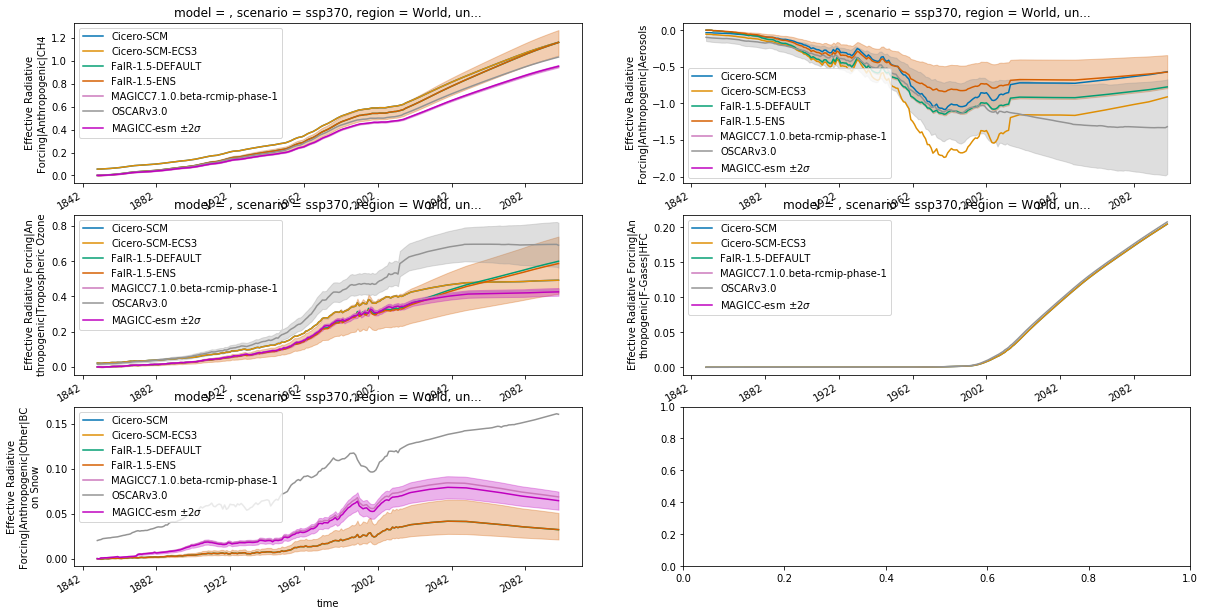

In [9]:
fig, axs = plt.subplots(3,2, figsize=[20,10])

for var,ax in zip(variables_erf_comp, axs.flatten()):
#var = 'Effective Radiative Forcing|Anthropogenic|Tropospheric Ozone'
    scn = 'ssp370'
    cmap = get_cmap_dic(ds.coords[climatemodel].values)
    for cm in ds.coords['climatemodel'].values:
        if 'MAGICC' in cm and 'rcmip' not in cm:
            continue
        if cm=='FaIR-1.5-ENS':
            vq1 = var + '|17th quantile'
            vq2 = var + '|83th quantile'
            try:
                ds[var+'|50th quantile'].sel(scenario=scn,climatemodel=cm).squeeze().plot(label=cm, 
                                                                                          color = cmap[cm], ax=ax)
            except KeyError:
                print()
                
        
        else:
            try:
                ds[var].sel(scenario=scn,climatemodel=cm).squeeze().plot(label=cm, color = cmap[cm], ax= ax)
            except ValueError:
                print()
            vq1 = var + '|16th quantile'
            vq2 = var + '|84th quantile'
        try:
            _da1 = ds[vq1].sel(scenario=scn, climatemodel=cm).squeeze()#, climatemodel=cm)#.plot()
            _da2 = ds[vq2].sel(scenario=scn, climatemodel=cm).squeeze()#, climatemodel=cm)#.plot()
            ax.fill_between(_da1.time, _da1, _da2, color=cmap[cm], alpha=.3)
        except KeyError:
            print()
    
    

    da_m_mean = ds_magic_mods[var].sel(scenario=scn).mean(climatemodel).squeeze()
    da_m_std = ds_magic_mods[var].sel(scenario=scn).std(climatemodel).squeeze()
    #if not np.all(_da.sel(climatemodel=cm).isnull())
    da_m_mean.plot(label=r'MAGICC-esm $\pm2\sigma$', color='m', ax=ax)
    ax.fill_between(da_m_mean.time, da_m_mean-da_m_std, da_m_mean+da_m_std, color='m', alpha=0.3)
    ax.legend()   
plt.show()

## Quantile vs. normal distribution quantile FaIR:

In [10]:
q_l_fair = [0,5, 10, 17, 33, 50, 67, 83,90,95,100]
tq_l_fair = ['|%sth quantile'%q for q in q_l_fair]

In [11]:
ds_fair = ds.sel(climatemodel='FaIR-1.5-ENS')

### Quantile vs quantile plot for estimated $\sigma$ from 83th and 17th percentile: FaIR:

/home/sarambl/miniconda3/envs/rcmip_ipcc/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2003: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/sarambl/miniconda3/envs/rcmip_ipcc/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2004: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
/home/sarambl/miniconda3/envs/rcmip_ipcc/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2003: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/sarambl/miniconda3/envs/rcmip_ipcc/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2004: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
/home/sarambl/miniconda3/envs/rcmip_ipcc/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2003: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home

Effective Radiative Forcing|Anthropogenic|F-Gases|HFC


/home/sarambl/miniconda3/envs/rcmip_ipcc/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2003: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/sarambl/miniconda3/envs/rcmip_ipcc/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2004: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


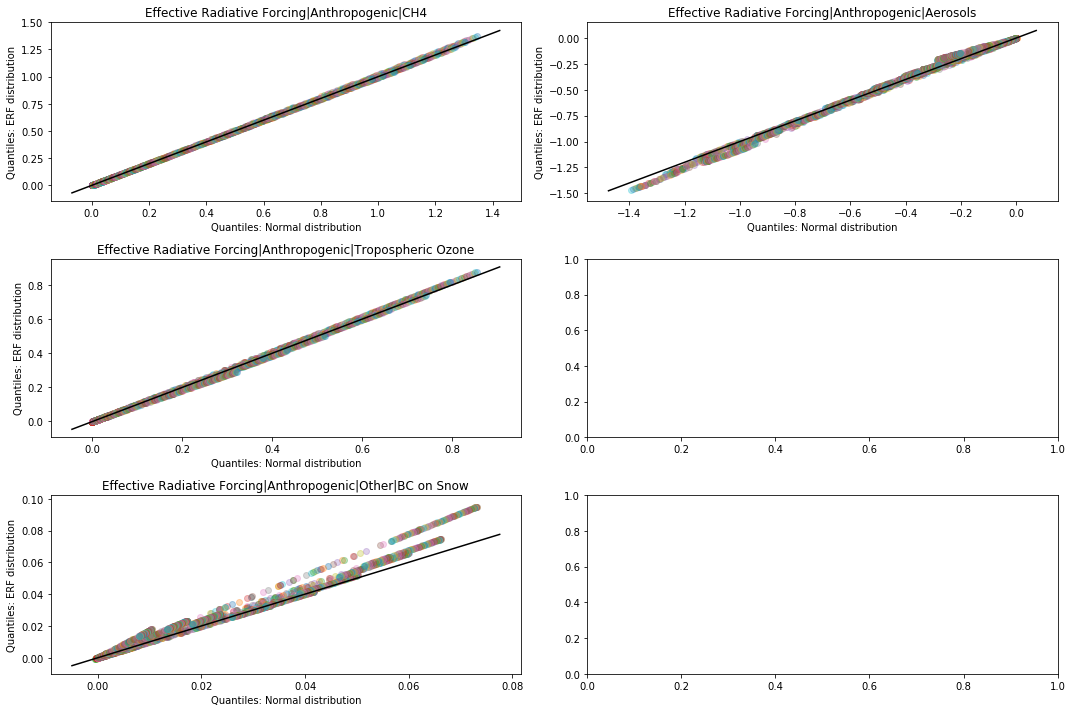

In [12]:
from scipy.stats import norm#.cdf#(x, loc=0, scale=1)
import numpy as np
scn='ssp370'
quantile='quantile'
ds_f_s = ds_fair.sel(scenario=scn)
fig,axs = plt.subplots(3,2, figsize=[15,10])
for var, ax in zip(variables_erf_comp, axs.flatten()):
    varl = [var+tq for tq in tq_l_fair]
    try:
        da = ds_f_s[varl].squeeze().to_array(dim=quantile)#['aad']
        da[quantile]=q_l_fair
        
        for t,i in zip(da.time, range(len(da.time))):
            _da = da.sel(time=t)
            med = _da.sel(quantile=50)
            sig = _da.sel(quantile=83, method='nearest')-_da.sel(quantile=50)#/2
            sig = (_da.sel(quantile=83)-_da.sel(quantile=17))/2
            dis=[]
            for q in q_l_fair:
                dis.append(norm.ppf(q/100., med, sig))
            dis=np.array(dis)

            ax.scatter(dis, _da, alpha=.3)#, c=da['time'])
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        ax.plot(xlim,xlim,c='k')
        ax.set_title(var)
        ax.set_xlabel('Quantiles: Normal distribution')
        ax.set_ylabel('Quantiles: ERF distribution')

    except KeyError:
        print(var)
    #das = [ds_f_s[v].squeeze() for v in varl ]
    #for t in ds_f_s['time']:
    #    _ds = ds_f_s.sel(time=t, )
fig.tight_layout()

# Error bars in $\Delta T$ calculations with RCMIP data:

Following is a brief description of the method used to produce the uncertainty bars in the figures. 

### General about computing $\Delta T$: 

We compute the change in GSAT temperature ($\Delta T$) from the effective radiative forcing (ERF) estimated from the RCMIP models (Nicholls et al 2020), by integrating with the impulse response function (IRF(t-t')) (Geoffroy at al 2013). See Nicholls et al (2020) for description of the RCMIP models and output. 

For any forcing agent $x$, with estimated ERF$_x$, the change in temperature $\Delta T$ is calculated as:


\begin{align*} 
\Delta T_x (t) &= \int_0^t ERF_x(t') IRF(t-t') dt' \\
\end{align*}

#### The Impulse response function (IRF):
In these calculations we use the impulse response function (Geoffroy et al 2013):
\begin{align*}
\text{IRF}(t)=& 0.885\cdot (\frac{0.587}{4.1}\cdot exp(\frac{-t}{4.1}) + \frac{0.413}{249} \cdot exp(\frac{-t}{249}))\\
\text{IRF}(t)= &  \frac{1}{\lambda}\sum_{i=1}^2\frac{a_i}{\tau_i}\cdot exp\big(\frac{-t}{\tau_i}\big) 
\end{align*}
with $\frac{1}{\lambda} = 0.885$ (K/Wm$^{-2}$), $a_1=0.587$, $\tau_1=4.1$(yr), $a_2=0.413$ and $\tau_2 = 249$(yr) (note that $i=1$ is the fast response and $i=2$ is the slow response and that $a_1+a_2=1$)


## Sources of uncertainty:
In these calculations we are considering the following variabilities/uncertainties
1. ERF estimate uncertainty: represented as the variability in the RCMIP models
2. Eqilibrium climate sensitivity(ECS) uncertainty/IRF uncertainty

ERF uncertainty is represented as the spread in the ERF produced by the considered RCMIP models. ECS uncertainty is the uncertainty by which the ERF is translated into changes in temperature. 

Starting with:

\begin{align*} 
\Delta T_x (t) &= \int_0^t ERF_x(t') IRF(t-t') dt' \\
\end{align*}

Now, define $\Delta_x$ as follows:
\begin{align}
\Delta_x  = & \lambda \int_0^t ERF_x(t') IRF(t-t') dt'\\
 =& \lambda \int_0^t ERF_x(t')   \sum_{i=1}^2\frac{ a_i}{\tau_i \cdot \lambda}\cdot exp\big(\frac{-(t-t')}{\tau_i}\big)dt' \\
 =&  \int_0^t ERF_x(t') \sum_{i=1}^2\frac{a_i}{\tau_i}\cdot exp\big(\frac{-(t-t')}{\tau_i}\big)dt' \\
\end{align}

So, then: 
\begin{align}
\Delta T_x (t) = \frac{1}{\lambda} \cdot \Delta_x(t)
\end{align}

This means that the uncertainty in $\Delta T$ can be calculated according to the propagated uncertainty/variability in the product of parameter $\frac{1}{\lambda}=\alpha$ and uncertainty in ERF$_x$.

**NB**: From here we make the assumption that it is good enough to represent the uncertainty of of the IRF through the value of $\frac{1}{\lambda}=\alpha$, and not to consider the values of $\tau_i$ and $a_i$.

### Distribution of a product of two independent variables:
For any two random variables X and Y: 
\begin{align}
Var(X\cdot Y) & = Cov(X^2,Y^2) + [Var(X) + E(X)^2] \cdot [Var(Y) + E(Y)^2] -[Cov(X,Y)+E(X)\cdot E(Y)]^2\\
 &= \sigma_{X^2,Y^2} + (\sigma_X^2 + \mu_X^2)\cdot(\sigma_Y^2 +\mu_Y^2)- (\sigma_{X,Y}+\mu_X\cdot\mu_Y)^2
\end{align}

If X and Y are independent:

\begin{align}
Var(X\cdot Y) &= (\sigma_X^2 + \mu_X^2)\cdot(\sigma_Y^2 +\mu_Y^2)- \mu_X^2\cdot\mu_Y^2
\end{align}

Assuming $\Delta_x$ and $\alpha=\frac{1}{\lambda}$ are independent we get:
\begin{align}
Var(\Delta T_x) = &Var(\alpha\cdot \Delta_{x})\\
 = & (Var(\alpha) +E(\alpha)^2)(Var(\Delta_{x}) + E( \Delta_{x})^2) - E(\alpha)^2E(\Delta_{x})^2
\end{align}

Let $\sigma_x= \sqrt{Var(\Delta_{x})}$, $\mu_x=  E(\Delta_{x})$, $\sigma_\alpha = \sqrt{Var(\alpha)}$ and $\mu_\alpha = E(\alpha)$ 

\begin{align}
Var(\Delta T_x) = (\sigma_x^2 + \mu_x^2)(\sigma_\alpha^2+\mu_\alpha^2) - \mu_x^2 \mu_\alpha^2
\end{align}

Since $\sigma_x$ and $\mu_x$ can be estimated from the RCMIP models output for each agent $x$ and $\sigma_\alpha$ and $\mu_\alpha$ is estimated  in chapter 7 of the WG1-AR6 report, we can calculate the uncertainty/variablitity in prediction with this formula above. 

**NB**: The formula above does not assume anything about the distribution of $\alpha$ and $\Delta_x$. However, by calculating the standard deviation and the mean, and not e.g. quantiles, we are assuming that these measures are good enough and hence that the distributions are not too skewed. 

## Sums and differences:
For the model outputted ERF, the ERF is decomposed into various component contributions (ozone, CH$_4$ etc). In the calculations of the temperature change (GSAT) for each component, we use the ERF for each component. 
If we want to look at differences or sums of temperature changes, e.g. the difference between methane contribution $X_i$ and the total anthropogenic contribution $Y$, we would have some covariance between between X and Y, because if one model has large $X_i$ it would normally have large $Y$ as well. 

 So either we can take this into account explicitly:
 $$ Var(X+Y) = Var(X)+Var(Y) +2Cov(X,Y)$$
 Here we use an alternative approach where we rather treat the sum or difference of the ERF as one stocastic variable and alpha as another and assume they are independent. The independence of the error on ECS and ERF is a good assumption here. Secondly, we do then not need to consider the covariance of ERF between different components because it is implicitly covered. 


## Method:

The following method is used:
1. Intra model variability from $ERF$ from different models
2. Assume this is independent of the $IRF$
3. Combine these two uncertainties with $Var(\Delta T_x) = (\sigma_x^2 + \mu_x^2)(\sigma_\alpha^2+\mu_\alpha^2) - \mu_x^2 \mu_\alpha^2$

In other words:


Let $\sigma_{\alpha}$ and $\mu_{\alpha}$ be the standard deviation and mean for a normal distribution of the $\alpha$ parameter in ECS. Secondly, let $Z_{i=1,...,N}$ be defined as

\begin{align}
Z_i  = & \lambda \int_0^t ERF_i(t') IRF(t-t') dt'\\
 =&  \int_0^t ERF_i(t') \sum_{i=1}^2\frac{a_i}{\tau_i}\cdot exp\big(\frac{-(t-t')}{\tau_1}\big)dt' \\
\end{align}
where $ERF_i$ is some difference or sum of different ERF components from model nr $i$. 

We then calculate the population standard deviation as  
\begin{align}
\sigma_{Z_i} = \frac{\sqrt{\sum(Z_{i}-\mu_Z)^2}}{N}
\end{align}

and we can get 
\begin{align}
\sigma_T = (\sigma_{X_i}+\mu_{Z_i})(\sigma_{\alpha} + \mu_{\alpha}) - \mu_{Z_i}\mu_{\alpha}
\end{align}

Finally, we then use $\sigma_T$ to represent an estimate of the uncertainty in the computed change in GSAT. 

### Technical detail:
Since ERFs for different components are assumed to be linearly independent, so will the estimated changes in GSAT. Thus from calculating any set of $\Delta T_c$, where $c$ signifies the components, we can calculate the change in GSAT from a sum or difference between components components, $\Delta T_*$, as follows: 
\begin{align}
\Delta T_{*} = \sum_{p\in P} \Delta T_p - \sum_{m \in M} \Delta T_m
\end{align}

Let $\Delta T_{\alpha=\mu_\alpha}$ signify the same as above, but with each $\Delta T_c$ calculated with the $\alpha = \frac{1}{\lambda}$ factor in the IRF specified as equal to the expected value $\mu_\alpha$:
\begin{align}
\Delta T_{\alpha=\mu_\alpha} =& \sum_{p\in P} T_{p, \alpha=\mu_\alpha} - \sum_{m \in M} T_{m, \alpha=\mu_\alpha}.
\end{align}
If we then calculate $\Delta T_{\alpha=\mu_\alpha,i}$ for each model $i$, we get :
\begin{align}
Z_{i} =& \frac{1}{\mu_{\alpha}} \Delta T_{\alpha=\mu_\alpha,i}
\end{align}
where the index $i$ signifies the different models. 

Now $Z_i$ is as above and independent of the choice of $\alpha = \frac{1}{\lambda}$.
Thus we can easily calculate
\begin{align}
\sigma_{Z} =& \frac{\sqrt{\sum(Z_{i}-\mu_{Z})^2}}{N}
\end{align}

since 
\begin{align}
\mu_{Z} = \frac{1}{\mu_\alpha}\mu_{\Delta T_{\alpha=\mu_\alpha}}
\end{align}
we have
\begin{align}
\sigma_{Z} = \frac{1}{\mu_\alpha} \sigma_{\Delta T_{\alpha=\mu_\alpha}}.
\end{align}

#### Finally:
Let $\Delta T = Z \cdot \alpha$ and assume $Z$ and $\alpha$ independent. 
Then

\begin{align}
\sigma_{\Delta T}^2 =& (\sigma_{Z}^2+\mu_{Z}^2)(\sigma_{\alpha}^2 + \mu_{\alpha}^2) - \mu_{Z}^2\mu_{\alpha}^2\\
\sigma_{\Delta T}^2 =& \frac{1}{\mu_\alpha^2}\big( (\sigma_{\Delta T_{\alpha=\mu_\alpha} }^2 +\mu_{\Delta T_{\alpha=\mu_\alpha}}^2)(\sigma_{\alpha}^2 +  \mu_{\alpha}^2) - \mu_{\Delta T_{\alpha=\mu_\alpha}}^2\mu_{\alpha}^2 \big)\\
\sigma_{\Delta T} =& \frac{1}{\mu_\alpha}\big((\sigma_{\Delta T_{\alpha=\mu_\alpha} }^2 +\mu_{\Delta T_{\alpha=\mu_\alpha}}^2)(\sigma_{\alpha}^2 + \mu_{\alpha}^2) - \mu_{\Delta T_{\alpha=\mu_\alpha}}^2\mu_{\alpha}^2 \big)^{\frac{1}{2}}
\end{align}

In [13]:
def sigma_com(sig_DT, mu_DT, sig_alpha, mu_alpha):
    return (((sig_DT ** 2 + mu_DT ** 2) * (
            sig_alpha ** 2 + mu_alpha ** 2) - mu_DT ** 2 * mu_alpha ** 2) / mu_alpha ** 2) ** (.5)

In other words, it suffices to know 

a) $\sigma_\alpha$ and $\mu_\alpha$ and 

b) $\Delta T_x$ calculated for a fixed $\mu_\alpha$ 

to compute the uncertainty bars. 

## Example with $\sigma_\alpha=0.24$ and $\mu_\alpha = 0.885$:

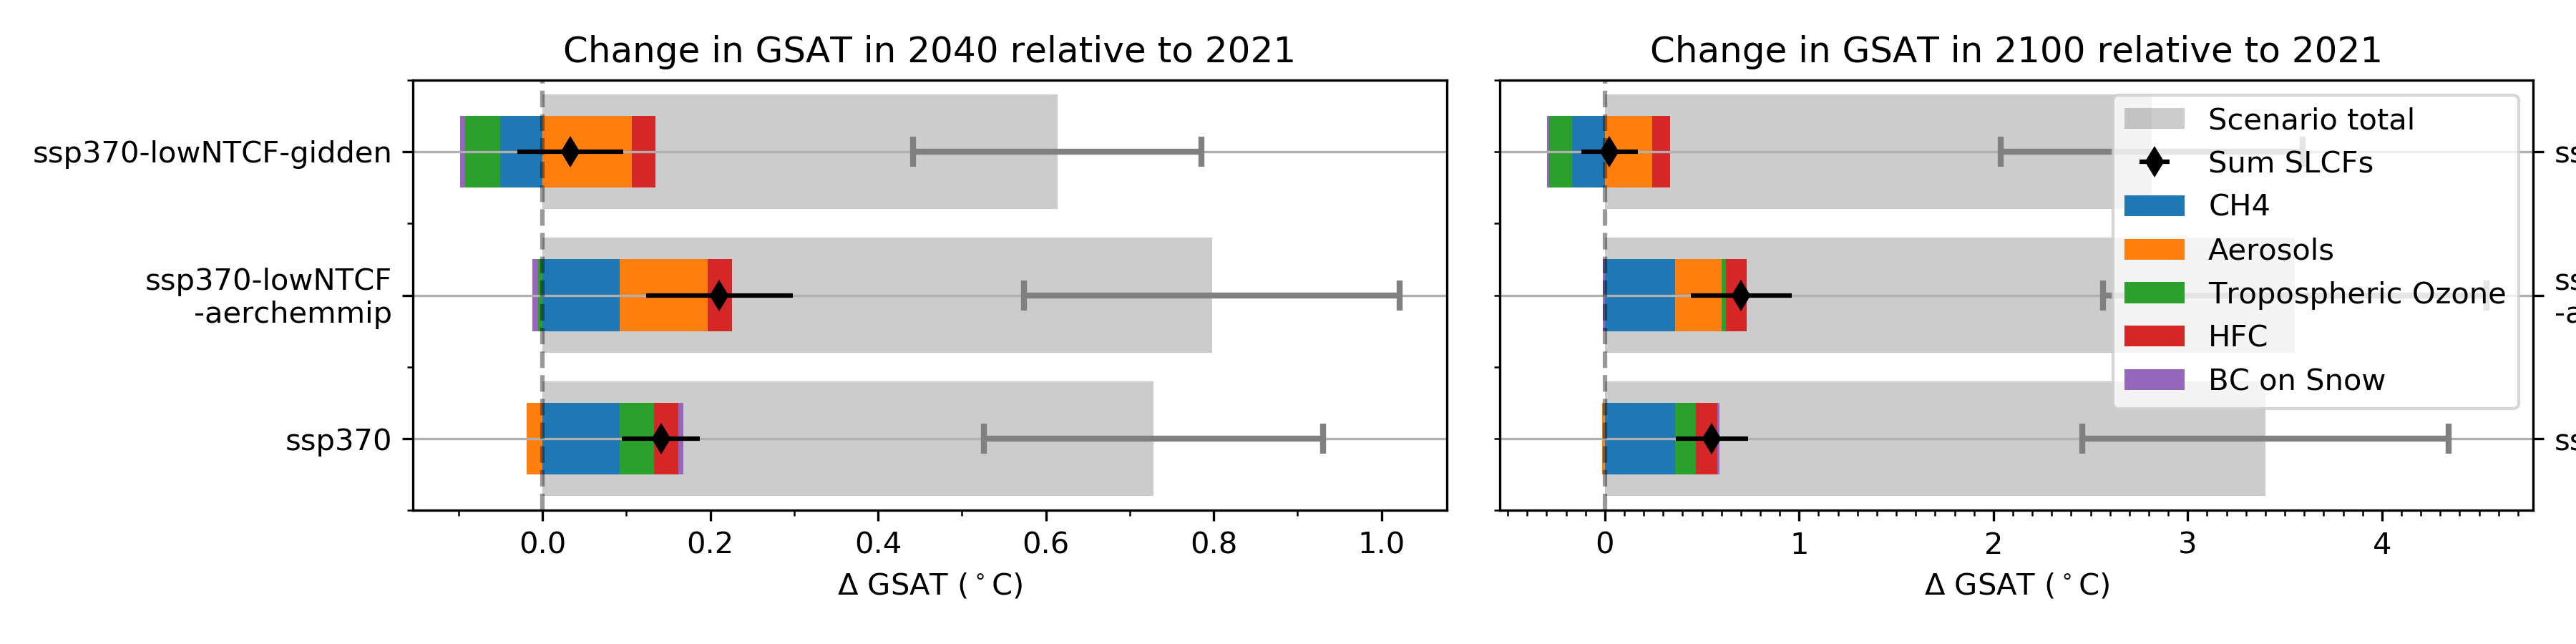

In [14]:
from ar6_ch6_rcmipfigs.constants import RESULTS_DIR
from IPython.display import Image

fn = RESULTS_DIR+ '/figures/stack_bar_influence_years_horiz_errTot.png'
Image(filename=fn) 

# Referances: 
- Geoffroy, O., Saint-Martin, D., Olivié, D. J. L., Voldoire, A., Bellon, G., and Tytéca, S. (2013). Transient Climate Response in a Two-Layer Energy-Balance Model. Part I: Analytical Solution and Parameter Calibration Using CMIP5 AOGCM Experiments. J. Clim. 26, 1841–1857. doi:10.1175/JCLI-D-12-00195.1.


- Nicholls, Z. R. J., Meinshausen, M., Lewis, J., Gieseke, R., Dommenget, D., Dorheim, K., Fan, C.-S., Fuglestvedt, J. S., Gasser, T., Golüke, U., Goodwin, P., Kriegler, E., Leach, N. J., Marchegiani, D., Quilcaille, Y., Samset, B. H., Sandstad, M., Shiklomanov, A. N., Skeie, R. B., Smith, C. J., Tanaka, K., Tsutsui, J., and Xie, Z.: Reduced complexity model intercomparison project phase 1: Protocol, results and initial observations, Geosci. Model Dev. Discuss., https://doi.org/10.5194/gmd-2019-375, in review, 2020.
 Nicholls Z. et al (2020), "Reduced complexity model intercomparison project phase 1: Protocol, results and initial observations", 
 https://www.geosci-model-dev-discuss.net/gmd-2019-375/

